# Práctico 6
## Regresión lineal. Regresión logística. Redes Neuronales.

### Grupo 6:
     - Guillermo Aguirre  C.I. 4817028-5
     - Bruno González C.I. 4815697-6
     - Mauricio Irace C.I. 4924714-6

## Instructivo
Primero se deben instalar las dependencias corriendo `pip install -r requirements.txt` ubicado en la carpeta `ej4/`.

La notebook ya presenta las corridas del código pero se puede correr manualmente.
Corriendo `python run.py` se ejecutará el código. La parte de las matrices de confusión fue solo hecha en la notebook por una cuestión de prolijidad, ya que si no, se abrirían pestañas con todas las gráficas o se generarían imágenes locales.
Lo que se imprime en la consola es el output de los mejores clasificadores con las medidas de accuracy, precisión, recall y medida-f para cada caso.

## Regresión Logística

La regresión logística es un método de clasificación al igual que los vistos en las otras tareas. La especificación es igual que en el caso de la regresión lineal, pero la predicción en vez de tomar valores continuos, toma valores discretos.

Como clasificador de regresión logística se utilizó el LogisticRegression de sklearn.
Dentro de los distintos algoritmos que se probaron para ver cual se ajustaba mejor a los datos se encuentran todos los soportados por dicho método: newton-cg, lbfgs, sag, saga, liblinear.

El objetivo principal de este ejercicio era encontrar y analizar el modelo que mejor clasificaba el corpus de aquienvoto. Para ésto se utilizó la técnica de la validación cruzada.
Este método consiste en dividir los datos de los que disponemos, utilizando unos para entrenar el modelo y evaluando o testeando con los que quedan libres. Este proceso se puede hacer cambiando varias veces los datos y variando el tamaño de la muestra. Gracias a este sistema podemos conocer como se puede comportar nuestro modelo con datos no utilizados para crearlo, asemejándose mucho más a lo que nos vamos a encontrar en la realidad.

La validación cruzada se puede llevar a cabo de varias formas:
La primera sería simplemente separar una parte de la muestra para entrenar el modelo y otra para testearlo, ésto fue lo que se hizo en la parte b del ejercicio. Esta es la forma más simple y la menos precisa ya que los resultados variarán mucho en función de las particiones que se elijan. Aquí se tomó 80% para el entrenamiento y 20% para la evaluación.

Una segunda forma es la Validación Cruzada K-Fold. Aquí la muestra la divimos en K-subconjuntos. Uno de los conjuntos lo utilizamos como datos de prueba y los demás de entrenamiento. Vamos iterando en función de los K que hayamos establecido. De esta manera conseguimos evaluar toda la muestra.

La segunda forma fue la utilizada en la parte c y d, para evaluar distintos clasificadores con distintos penalties.

Los datos iniciales se filtraron, sacando a los candidatos y partidos que tuvieran menos de 1000 votos.
Los partidos restantes fueron: Frente Amplio, Partido Nacional, Partido Colorado, Partido de la Gente y La Alternativa.
Mientras que los candidatos restantes fueron: Carolina Cosse, Daniel Martínez, Edgardo Novick, Ernesto Talvi, Jorge Larrañaga, Juan Sartori, Julio María Sanguinetti, Luis Lacalle Pou, Mario Bergara, Oscar Andrade, Pablo Mieres.

Para la parte de PCA en cada caso se probó con N = {1,...,5}, siendo N el número de componentes resultantes.

## Ejecución

In [1]:
%matplotlib inline
import warnings
import datetime
import pandas as pd
import seaborn as sn
from time import time
from sklearn import metrics
from sklearn.metrics import pairwise_distances, adjusted_rand_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from src.classifier import Classifier
import matplotlib.pyplot as plt
import numpy as np
from pandas_ml import ConfusionMatrix
from run import run

In [2]:
result = run()

party
Frente Amplio          12421
La Alternativa          1037
Partido Colorado        7268
Partido Nacional        8027
Partido de la Gente     1201
Name: party, dtype: int64
name
Carolina Cosse             4062
Daniel Martínez            5209
Edgardo Novick             1201
Ernesto Talvi              5515
Jorge Larrañaga            1345
Juan Sartori               1835
Julio María Sanguinetti    1753
Luis Lacalle Pou           4847
Mario Bergara              1696
Oscar Andrade              1454
Pablo Mieres               1037
Name: name, dtype: int64
----------------------------------------
######### CANDIDATOS | ('saga', 'l2', 5, 0.38926766238853244) #########
accuracy: 0.3875813720580871
precision: 0.3875813720580871
recall: 0.3875813720580871
f1: 0.3875813720580872
----------------------------------------
----------------------------------------
######### CANDIDATOS_PCA | ('saga', 'l1', 3, 0.3781655965893708), 4 #########
accuracy: 0.3411784343181439
precision: 0.3411784343181439


In [18]:
actual = list(result['results']['candidatos'][0])
pred = list(result['results']['candidatos'][1])
cm_cand = ConfusionMatrix(actual, pred)

actual = list(result['results']['candidatos_pca'][0])
pred = list(result['results']['candidatos_pca'][1])
cm_pca_cand = ConfusionMatrix(actual, pred)

actual = list(result['results']['partidos'][0])
pred = list(result['results']['partidos'][1])
cm_part = ConfusionMatrix(actual, pred)

actual = list(result['results']['partidos_pca'][0])
pred = list(result['results']['partidos_pca'][1])
cm_pca_part = ConfusionMatrix(actual, pred)

actual = list(result['results']['partidos_candidatos'][0])
pred = list(result['results']['partidos_candidatos'][1])
cm_cand_part = ConfusionMatrix(actual, pred)

## Análisis de clasificaciones

Como podemos ver de los resultados de la ejecución, la clasificación utilizando PCA fue en todos los casos menor a utilizar los datos originales. Esto concuerda con el sentido común, ya que al reducir el número de componentes se tiene una pérdida de información que en este caso se vió reflejada con una precisión menor.

Algo que pueda explicar la mala clasificación de los candidatos puede ser que las preguntas son preguntas bastante generales, en el sentido de que la misma respuesta a una pregunta puede asociarse a varios candidatos.
Por ejemplo: *Las FF.AA. deberían tener un rol activo en la seguridad pública.* Ésta pregunta seguramente tenga la misma respuesta por gente que comparte ideología, haciendo difícil la diferenciación de a qué candidato votarían.

Lo interesante de ver también es que la clasificación de candidatos fue, en promedio, la mitad de precisa que la de partidos, incluso en el caso donde se utilizó el clasificador de candidatos y se mapearon los resultados a los partidos. Creemos que esto se debe en parte por el margen de error que existe entre clasificar mal un candidato y clasificar mal un partido. 
Ejemplificando este punto anterior: Si tengo que clasificar a Cosse y lo clasifico como Martínez para el clasificador de candidatos esto está mal, pero si se da lo mismo en el de partidos sería una clasificación correcta. Tiene sentido que las respuestas que dan a un candidato estén relacionadas con los otros candidatos del mismo partido, llevando a que se puedan 'agrupar' más entre sí los partidos, haciendo más precisa la clasificación. 
A su vez el problema de las preguntas planteado anteriormente puede ser otra de las razones por las cuales el clasificador de partidos tuvo una mejor precisión, ya que el tipo de pregunta genérica si sirve para diferenciar personas con ideologías distintas.

## Matrices de confusión

#### Clasificador de candidatos (algoritmo: saga, penalty: l2, k-plot: 5)

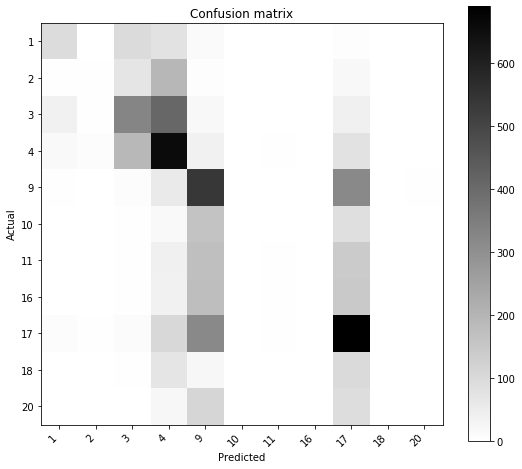

In [15]:
cm_cand.plot()

#### Clasificador de candidatos con PCA (algoritmo: saga, penalty: l1, k-plot: 3, componentes: 4)

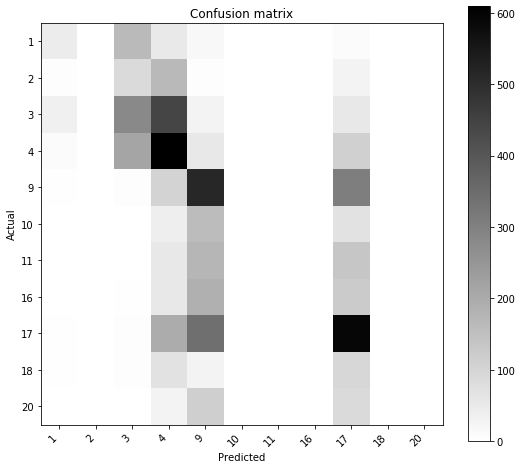

In [17]:
cm_pca_cand.plot()

#### Clasificador de partidos (algoritmo: newton-cg, penalty: l2, k-plot: 5)

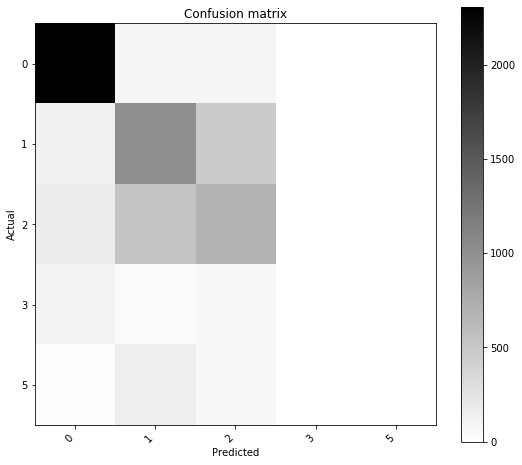

In [19]:
cm_part.plot()

#### Clasificador de partidos (algoritmo: newton-cg, penalty: l2, k-plot: 3, componentes: 4)

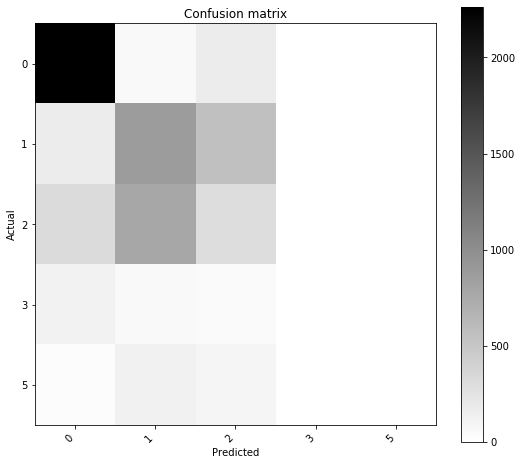

In [20]:
cm_pca_part.plot()

#### Clasificador de candidatos (algoritmo: saga, penalty: l2, k-plot: 5)

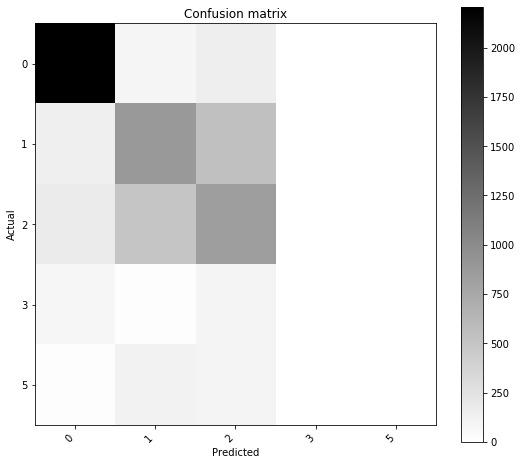

In [21]:
cm_cand_part.plot()

## Análisis de matrices de confusión

En las matrices de confusión de candidatos se puede apreciar una clara distinción entre Daniel Martínez, Luis Lacalle Pou y Ernesto Talvi. Excepto por Talvi, los otros dos candidatos son los que lideran las encuestas por sus partidos.
Puede ser que pase esto por el cesgo de la cantidad de 'votos' que hay en el data set para estos candidatos y por eso sea capaz de clasificarlos mejor.
Lo que se puede apreciar también es que confundió en varias ocasiones a Talvi con Lacalle Pou, indicando que puede ser que los votantes de éstos dos candidatos compartan principios e ideologías. Se da la casualidad de que Talvi y Lacalle Pou mantienen propuestas muy parecidas respecto al gasto público, entre otras cosas.
También hay una clara similaridad entre Martínez y Cosse, siendo estos los que lideran las encuestas y teniendo perfiles muy parecidos entre sí. Ambos ingenieros y directores de entes públicos, los cuales adiheren a las propuestas conjuntas que hace como partido el FA.

En las matrices de partidos se ve claramente una diferencia de ideologías, por más que no nos guste la separación lineal entre 'izquierda' y 'derecha', la clasificación refleja una seguridad considerable cuando del FA se trata y una menor precisión cuando trata de asignar las respuestas al PN o al PC. Demostrando que dentro del corpus estudiado existe una antítesis entre votantes de 'izquierda' y votantes de 'derecha'.